In [1]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import copy
import torch as tr

# import scripts
from src.plotter import rosenbrock_plot
from src.plotter import convergent_plot as cplot

dtype = tr.float32

In [2]:
folder = "./data"; os.listdir(folder)

['20_bo.pt', '20_adam.pt', '20_es.pt']

In [3]:
index = 0

In [4]:
files = f"{os.listdir(folder)[index]}"

In [5]:
obj = tr.load(os.path.join(folder, files))

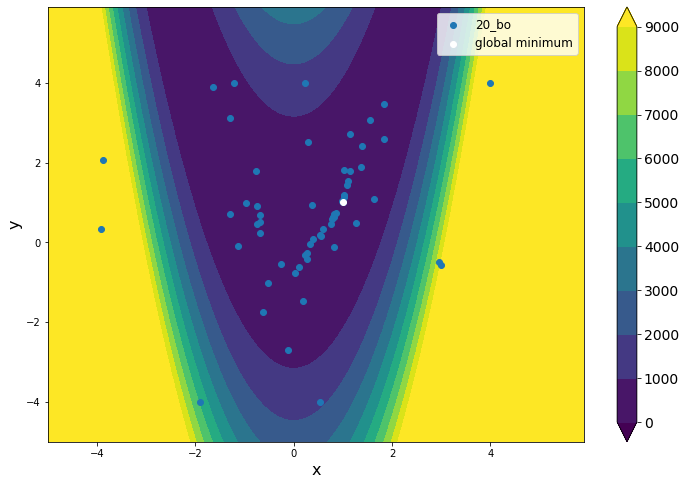

In [6]:
rosenbrock_plot.plot(np.arange(-5, 6,.1), np.arange(-5, 6,.1), [obj])

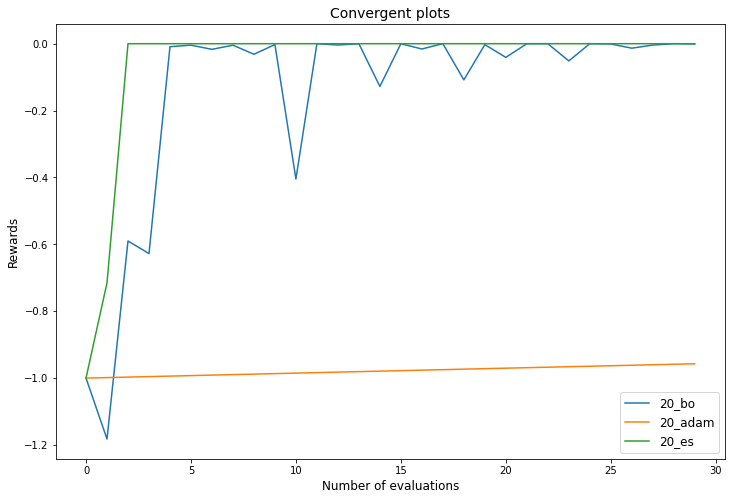

In [7]:
cplot.plot_all(folder, 30)

In [100]:
obj["y"]

tensor([[-1.0000e+00],
        [-1.1822e+00],
        [-5.8997e-01],
        [-6.2760e-01],
        [-9.0848e-03],
        [-4.3783e-03],
        [-1.6911e-02],
        [-4.4416e-03],
        [-3.1606e-02],
        [-2.6184e-03],
        [-4.0479e-01],
        [-9.5905e-06],
        [-4.0321e-03],
        [-1.1059e-04],
        [-1.2793e-01],
        [-1.5870e-04],
        [-1.5849e-02],
        [-5.1782e-05],
        [-1.0816e-01],
        [-2.9268e-03],
        [-4.0872e-02],
        [-8.5635e-05],
        [-2.0105e-05],
        [-5.1521e-02],
        [-6.0118e-06],
        [-8.1071e-04],
        [-1.3457e-02],
        [-4.1180e-03],
        [-5.2569e-06],
        [-7.3442e-04],
        [-1.6098e-05],
        [-9.5963e-08],
        [-1.5607e-04],
        [-6.6846e-05],
        [-4.2134e-04],
        [-1.7423e-03],
        [-4.5902e-05],
        [-1.4185e-03],
        [-4.3652e-06],
        [-1.0411e-03],
        [-2.7381e-05],
        [-6.9721e-03],
        [-7.8126e-05],
        [-1